# N - meetings in one room
There is one meeting room in a firm. There are N meetings in the form of (start[i], end[i]) where start[i] is start time of meeting i and end[i] is finish time of meeting i.
What is the maximum number of meetings that can be accommodated in the meeting room when only one meeting can be held in the meeting room at a particular time?

Note: Start time of one chosen meeting can't be equal to the end time of the other chosen meeting.


In [1]:
class Solution:
    
    # Function to find the maximum number of meetings that can
    # be performed in a meeting room.
    def maximumMeetings(self, n, start, end):
        # Combine the start and end times of meetings for easier sorting
        for i in range(n):
            start[i] = [start[i], end[i]]
        
        # Sort the meetings based on their end times
        start.sort(key=lambda x: x[1])
        
        count = 1  # Initialize the count of meetings
        
        lmeet = start[0]  # Initialize the last meeting
        
        # Iterate through the sorted meetings and check if a meeting can be accommodated
        for i in range(1, n):
            if lmeet[1] < start[i][0]:
                count += 1
                lmeet = start[i]
        
        return count  # Return the maximum number of meetings that can be held

# Job sequencing Problem
Given a set of N jobs where each jobi has a deadline and profit associated with it.

Each job takes 1 unit of time to complete and only one job can be scheduled at a time. We earn the profit associated with job if and only if the job is completed by its deadline.

Find the number of jobs done and the maximum profit.

Note: Jobs will be given in the form (Jobid, Deadline, Profit) associated with that Job.

In [2]:
class Solution:
    
    # Function to find the maximum profit and the number of jobs done.
    def JobScheduling(self, Jobs, n):
        # Sort the jobs in descending order of their profits
        Jobs.sort(key=lambda x: x.profit, reverse=True)
        
        # Initialize an array to keep track of scheduled jobs and other variables
        ans = [0 for _ in range(n)]
        count = 0  # Number of jobs done
        sum1 = 0   # Maximum profit
        
        # Iterate through the sorted jobs
        for item in Jobs:
            # If the slot for the job's deadline is empty, schedule the job
            if ans[item.deadline - 1] == 0:
                ans[item.deadline - 1] = item.profit
                sum1 += item.profit
                count += 1
            else:
                dline = item.deadline - 1
                
                # Find an empty slot with a deadline that allows scheduling this job
                for key in range(dline, -1, -1):
                    if ans[key] == 0:
                        ans[key] = item.profit
                        sum1 += ans[key]
                        count += 1
                        break
        
        # Return the number of jobs done and the maximum profit
        return [count, sum1]


# Huffman Encoding


**Huffman encoding - mainly two major parts in Huffman Coding**
1. Build a Huffman Tree from input characters.
2. Traverse the Huffman Tree and assign codes to characters.




Given a string S of distinct character of size N and their corresponding frequency f[ ] i.e. character S[i] has f[i] frequency. Your task is to build the Huffman tree print all the huffman codes in preorder traversal of the tree.
Note: While merging if two nodes have the same value, then the node which occurs at first will be taken on the left of Binary Tree and the other one to the right, otherwise Node with less value will be taken on the left of the subtree and other one to the right.

In [3]:
class HuffNode:
    def __init__(self, freq, sym, left=None, right=None):
        self.freq=freq  # Frequency of the node
        self.sym=sym    # Symbol or character associated with the node
        self.left=left  # Left child node
        self.right=right  # Right child node
        self.huff=''    # Huffman code assigned to the node
    def __lt__(self, nxt):
        return self.freq < nxt.freq  # Comparison method for heapq

import heapq
class Solution:
    def getRes(self, temp, res, val=''):
        """
        Recursively traverse the Huffman tree to generate Huffman codes
        for each symbol and store them in the 'res' list.
        """
        if temp:
            val = val + str(temp.huff)
            self.getRes(temp.left, res, val)
            self.getRes(temp.right, res, val)
            if not temp.left and not temp.right:
                res.append(val)
    
    def huffmanCodes(self,S,f,N):
        node = []
        # Create HuffNode objects for each symbol and its frequency
        for i in range(N):
            heapq.heappush(node, HuffNode(f[i], S[i]))
        
        # Build the Huffman tree using heapq
        while len(node) > 1:
            left = heapq.heappop(node)
            left.huff = '0'
            right = heapq.heappop(node)
            right.huff = '1'
            heapq.heappush(node, HuffNode(left.freq+right.freq, left.sym+right.sym, left, right))
            
        res = []  # List to store generated Huffman codes
        temp = node[0]  # Root of the Huffman tree
        self.getRes(temp, res)  # Generate Huffman codes
        
        return res  # Return the list of Huffman codes


# Water Connection Problem:
There are n houses and p water pipes in Geek Colony. Every house has at most one pipe going into it and at most one pipe going out of it. Geek needs to install pairs of tanks and taps in the colony according to the following guidelines.  
1. Every house with one outgoing pipe but no incoming pipe gets a tank on its roof.
2. Every house with only one incoming and no outgoing pipe gets a tap.
The Geek council has proposed a network of pipes where connections are denoted by three input values: ai, bi, di denoting the pipe of diameter di from house ai to house bi.
Find a more efficient way for the construction of this network of pipes. Minimize the diameter of pipes wherever possible.
Note: The generated output will have the following format. The first line will contain t, denoting the total number of pairs of tanks and taps installed. The next t lines contain three integers each: house number of tank, house number of tap, and the minimum diameter of pipe between them.

In [4]:
class Solution:
    def solve(self, n, p ,a, b, d): 
        # Initialize an adjacency list to represent the pipes between houses.
        adj = [[] for _ in range(n+1)]
        
        # Create a set to keep track of houses with outgoing pipes.
        set1 = set()
        
        # Populate the adjacency list and the set of houses with outgoing pipes.
        for i in range(p):
            adj[a[i]].append([b[i], d[i]])
            set1.add(a[i])
        
        ans = []
        
        # Iterate through the houses and find those with no outgoing pipes (set1).
        for i in range(p):
            if b[i] in set1 :
                set1.remove(b[i])
            
        # For each house without outgoing pipes, perform DFS to find the optimal pipe diameter.
        for u in set1:
            self.dfs(u, u, adj, ans, float('inf'))
        
        return ans
        
    def dfs(self, u, start, adj, ans, dia):
        # DFS function to find the optimal pipe diameter for each tank-tap pair.
        
        # If the current house u has no further outgoing pipes, add the tank-tap pair to the result.
        if len(adj[u]) == 0 :
            ans.append([start, u, dia])
            return 
        
        # Iterate through the outgoing pipes from house u and continue DFS on the connected houses.
        for [v, d] in adj[u]:
            self.dfs(v, start, adj, ans, min(dia, d))
        
        return


# Fractional Knapsack
#### Note: Repitition is not allowed
Given weights and values of N items, we need to put these items in a knapsack of capacity W to get the maximum total value in the knapsack.
Note: Unlike 0/1 knapsack, you are allowed to break the item. 

In [5]:
class Item:
    def __init__(self,val,w):
        self.value = val
        self.weight = w

class Solution:
    # Function to get the maximum total value in the knapsack.
    def fractionalknapsack(self, W,arr,n):
        # Sort the items based on their value-to-weight ratio in descending order.
        arr.sort(key=lambda x: (x.value / x.weight), reverse=True)
        
        i = 0
        ans = 0.0
        
        # Iterate through the items while there's capacity in the knapsack.
        while W > 0 and i < n:
            wt = arr[i].weight
            val = arr[i].value
            i += 1
            
            # If the weight of the current item exceeds the remaining capacity,
            # calculate the fraction of the item that can be included.
            if wt > W:
                unit = val / wt
                ans += unit * W
                W = 0
            else:
                # Include the entire item as it fits within the remaining capacity.
                ans += val
                W -= wt
                
        return ans


# Choose and Swap 
You are given a string s of lower case english alphabets. You can choose any two characters in the string and replace all the occurences of the first character with the second character and replace all the occurences of the second character with the first character. Your aim is to find the lexicographically smallest string that can be obtained by doing this operation at most once.

In [6]:
class Solution:
    def chooseandswap(self, A):
        # Create a dictionary to keep track of character presence.
        map1 = {}
        
        # Iterate through the string to populate the dictionary.
        for item in A:
            map1[item] = True
        
        # Iterate through the string to find the lexicographically smallest replacement.
        for letter in A:
            # Iterate through characters with lower ASCII values.
            for item in range(ord('a'), ord(letter)):
                if chr(item) in map1 and map1[chr(item)]:
                    # Replace occurrences of 'letter' with '*' and 'chr(item)' with 'letter'.
                    A = A.replace(letter, "*")
                    A = A.replace(chr(item), letter)
                    A = A.replace('*', chr(item))
                    
                    return A
                
            # Mark the current letter as not available for further replacements.
            map1[letter] = False
        
        return A


# Maximum Trains for which stoppage can be provided
You are given n-platform and two main running railway tracks for both directions. Trains that need to stop at your station must occupy one platform for their stoppage and the trains which need not stop at your station will run away through either of the main track without stopping. Now, each train has three values first arrival time, second departure time, and the third required platform number. We are given m such trains you have to tell the maximum number of trains for which you can provide stoppage at your station.

Note: Trains are given in the form of {arrival time, departure time, platform Number} and the arrival time and departure time are represented by a 4-digit integer as 1030 will represent 10:30 and 912 will represent 09:12 (24 hour Clock).

In [7]:
class Solution():
    def maxStop(self, n, m, trains):
        # Swap arrival time and platform number for easier sorting.
        for i in range(m):
            trains[i][0], trains[i][2] = trains[i][2], trains[i][0]
    
        # Sort the trains based on their departure time.
        trains.sort(key = lambda x:x[1])
        
        # Create an array to store platform information [last departure time, required arrival time].
        pfs = [[-1] for _ in range(n+1)]
        
        count = 0  # Initialize the count of trains that can stop.
        
        for item in trains:
            if pfs[item[0]] == [-1]:  # If the platform is available for the current train.
                pfs[item[0]] = [item[2], item[1]]  # Update platform information.
                count += 1  # Increment the count of trains.
            elif pfs[item[0]][1] <= item[2]:  # If the platform's last departure time is earlier than the train's arrival time.
                pfs[item[0]] = [item[2], item[1]]  # Update platform information.
                count += 1  # Increment the count of trains.
                
        return count  # Return the maximum number of trains that can stop.


# Minimum Plateforms
Given arrival and departure times of all trains that reach a railway station. Find the minimum number of platforms required for the railway station so that no train is kept waiting.
Consider that all the trains arrive on the same day and leave on the same day. Arrival and departure time can never be the same for a train but we can have arrival time of one train equal to departure time of the other. At any given instance of time, same platform can not be used for both departure of a train and arrival of another train. In such cases, we need different platforms.

In [8]:
class Solution:    
    # Function to find the minimum number of platforms required at the
    # railway station such that no train waits.
    def minimumPlatform(self, n, arr, dep):
        # Sort the arrival and departure times.
        arr.sort()
        dep.sort()
        
        i = 1  # Pointer for the next arrival time.
        j = 0  # Pointer for the current departure time.
        
        max_pfs = 1  # Maximum number of platforms required.
        count = 1  # Initialize count of platforms in use.
        
        while i < n and j < n:
            if arr[i] <= dep[j]:
                # If a train arrives before or at the same time as the current departure, a new platform is needed.
                count += 1
                i += 1
            else:
                # If a train departs before the next arrival, a platform becomes available.
                count -= 1
                j += 1
            
            # Update the maximum number of platforms required.
            max_pfs = max(max_pfs, count)
    
        return max_pfs  # Return the maximum number of platforms required.

# Buy maximum stocks if i stocks can be bought on ith day
In a stock market, there is a product with its infinite stocks. The stock prices are given for N days, where price[i] denotes the price of the stock on the ith day.
There is a rule that a customer can buy at most i stock on the ith day.
If the customer has an amount of k amount of money initially. The task is to find out the maximum number of stocks a customer can buy. 

In [9]:
from typing import List

class Solution:
    def buyMaximumProducts(self, n: int, k: int, price: List[int]) -> int:
        # Convert the price list to pairs of (price, day).
        for i in range(n):
            price[i] = [price[i], i + 1]
        
        # Sort the prices in ascending order.
        price.sort(key=lambda x: x[0])
        
        i = 0  # Pointer for iterating through the prices.
        count = 0  # Initialize the count of stocks bought.
        
        # Iterate through the sorted prices and calculate the maximum stocks the customer can buy.
        while k > 0 and i < n:
            if price[i][0] <= k:
                # Calculate the maximum number of stocks that can be bought on the current day.
                x = k // price[i][0]
                
                if x < price[i][1]:
                    # If the maximum stocks that can be bought is less than the available stocks on that day.
                    count += x
                    k -= price[i][0] * x
                elif x >= price[i][1]:
                    # If the available stocks on that day can be bought completely.
                    count += price[i][1]
                    k -= price[i][0] * price[i][1]
            
            i += 1
        
        return count  # Return the maximum number of stocks bought.


# Shop in Candy store
In a candy store, there are N different types of candies available and the prices of all the N different types of candies are provided to you.
You are now provided with an attractive offer.
For every candy you buy from the store and get at most K other candies ( all are different types ) for free.
Now you have to answer two questions. Firstly, you have to find what is the minimum amount of money you have to spend to buy all the N different candies. Secondly, you have to find what is the maximum amount of money you have to spend to buy all the N different candies.
In both the cases you must utilize the offer i.e. you buy one candy and get K other candies for free.

In [10]:
class Solution:
    def candyStore(self, candies, N, K):
        # Sort the candy prices in ascending order.
        candies.sort()
        
        min_cost = 0  # Initialize the minimum cost variable.
        n = N  # Initialize the number of candies variable.
        i = 0  # Initialize the index for iterating through sorted candies.
        
        # Calculate the minimum amount of money required to buy all candies.
        while i < N and n > 0:
            min_cost += candies[i]  # Add the price of the current candy.
            i += 1  # Move to the next candy.
            n -= (1 + K)  # Reduce the count of remaining candies considering the offer.
        
        max_cost = 0  # Initialize the maximum cost variable.
        n = N  # Reset the number of candies variable.
        i = N - 1  # Start from the highest-priced candy.
        
        # Calculate the maximum amount of money required to buy all candies.
        while i >= 0 and n > 0:
            max_cost += candies[i]  # Add the price of the current candy.
            i -= 1  # Move to the previous candy.
            n -= (1 + K)  # Reduce the count of remaining candies considering the offer.
        
        return min_cost, max_cost  # Return the calculated minimum and maximum costs.


# Minimize Cash Flow ---- VVVVVVVVVVVVVVVVVVVV Impo
Given a number of friends who have to give or take some amount of money from one another. Design an algorithm by which the total cash flow among all the friends is minimized. 

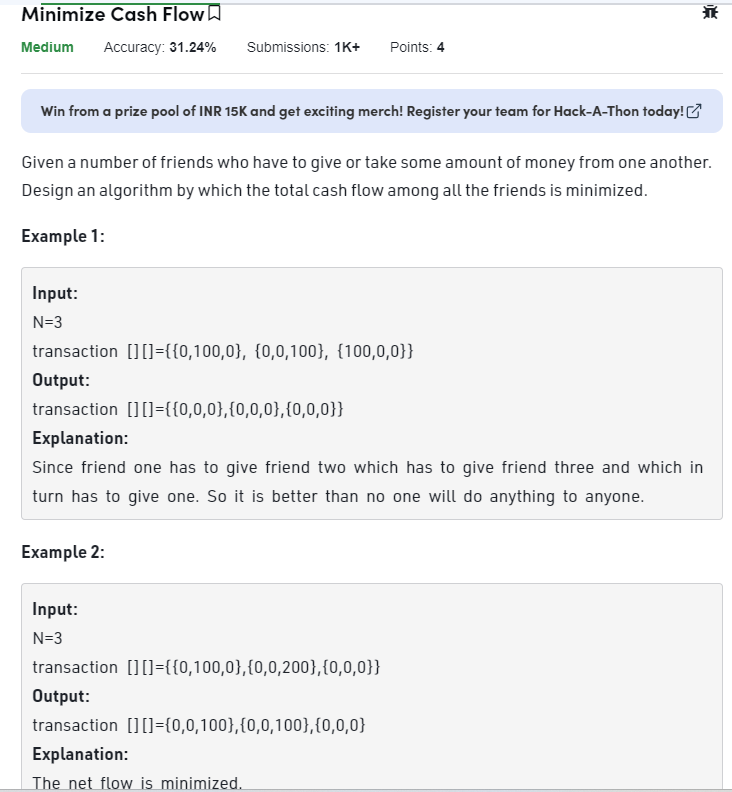

In [11]:
class Solution:
    def minCashFlow(self, n, g):
        # Initialize the result matrix with zeros
        res = [[0] * n for x in range(n)]
        
        # Function to find the index of the minimum element in a list
        def min_idx(flow):
            min_id = 0
            for i in range(len(flow)):
                if(flow[i] < flow[min_id]):
                    min_id = i
            return min_id
        
        # Function to find the index of the maximum element in a list
        def max_idx(flow):
            max_flow = 0
            for i in range(len(flow)):
                if(flow[i] > flow[max_flow]):
                    max_flow = i
            return max_flow
            
        # Initialize the net balance list for each friend
        flow = [0] * n
        for i in range(n):
            for j in range(n):
                # Calculate the net balance for friend i by subtracting what they owe from what they are owed
                flow[i] += (g[j][i] - g[i][j])
        
        # Iterate until all debts are settled
        while(1):
            # Find the friend with the smallest debt
            min_id = min_idx(flow)
            # Find the friend with the largest debt
            max_id = max_idx(flow)
            
            # Get the debt amounts for the smallest and largest debt friends
            max_donate = flow[min_id]
            max_take = flow[max_id]
            
            # If both the largest debt and smallest debt are zero, all debts are settled, so return the result
            if(max_take == 0 and max_donate == 0):
                return res
            else:
                # Calculate the minimum amount that can be settled between the friends
                min_amount = min(-max_donate, max_take)
                
                # Update the debt amounts for the friends involved in the transaction
                flow[min_id] += min_amount
                flow[max_id] -= min_amount
                
                # Update the result matrix with the settled amount between the friends
                res[min_id][max_id] = min_amount


# Minimum cost to cut a board into squares
A board of length M and width N is given. The task is to break this board into M * N squares such that cost of breaking is minimum. The cutting cost for each edge will be given for the board in two arrays X[] and Y[]. In short, you need to choose such a sequence of cutting such that cost is minimized. Return the minimized cost.
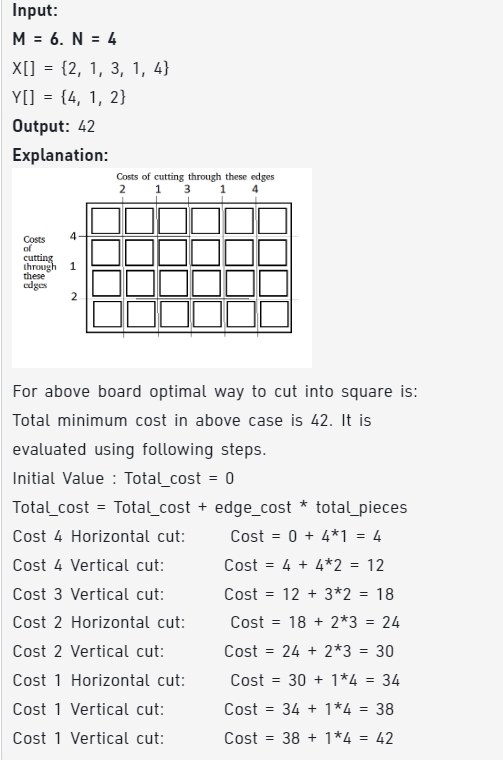

# CHOCOLA - Chocolate

We are given a bar of chocolate composed of m*n square pieces. One should break the chocolate into single squares. Parts of the chocolate may be broken along the vertical and horizontal lines as indicated by the broken lines in the picture.

A single break of a part of the chocolate along a chosen vertical or horizontal line divides that part into two smaller ones. Each break of a part of the chocolate is charged a cost expressed by a positive integer. This cost does not depend on the size of the part that is being broken but only depends on the line the break goes along. Let us denote the costs of breaking along consecutive vertical lines with x1, x2, ..., xm-1 and along horizontal lines with y1, y2, ..., yn-1.

The cost of breaking the whole bar into single squares is the sum of the successive breaks. One should compute the minimal cost of breaking the whole chocolate into single squares.

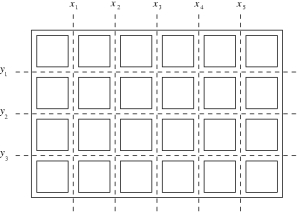

For example, if we break the chocolate presented in the picture first along the horizontal lines, and next each obtained part along vertical lines then the cost of that breaking will be y1+y2+y3+4*(x1+x2+x3+x4+x5).
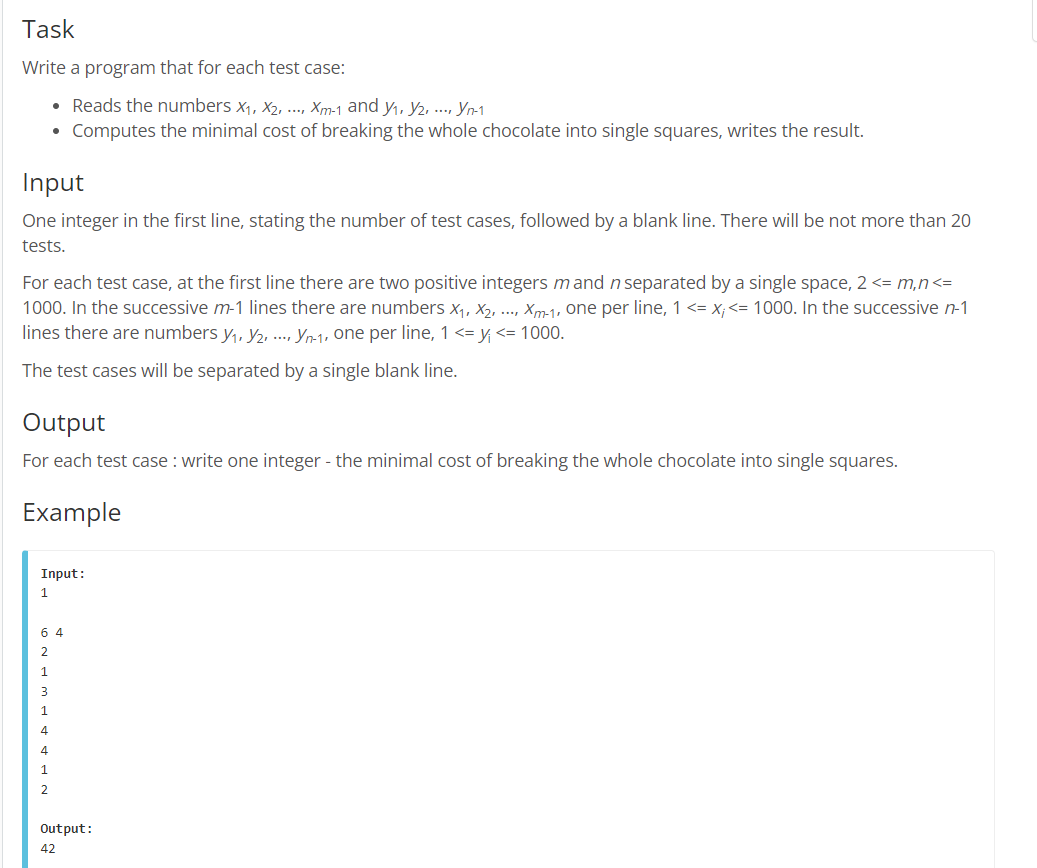

In [12]:
from typing import List

class Solution:
    def minimumCostOfBreaking(self, X: List[int], Y: List[int], M: int, N: int) -> int:
        # Initialize the horizontal and vertical pieces, and sort the cost arrays in reverse order
        hp = 1  # Start with one horizontal piece
        vp = 1  # Start with one vertical piece
        X.sort(reverse=True)
        Y.sort(reverse=True)
        
        cost = 0  # Initialize the total cost
        
        i = 0  # Pointer for the X array
        j = 0  # Pointer for the Y array
        
        # Iterate until either the X array or the Y array is exhausted
        while i < M - 1 and j < N - 1:
            if X[i] > Y[j]:
                # Choose to make a horizontal cut
                cost += X[i] * vp  # Add the cost of the horizontal cut
                hp += 1  # Increase the count of horizontal pieces
                i += 1   # Move the pointer in the X array
            
            else:
                # Choose to make a vertical cut
                cost += Y[j] * hp  # Add the cost of the vertical cut
                vp += 1  # Increase the count of vertical pieces
                j += 1   # Move the pointer in the Y array
        
        # Complete any remaining cuts in the X array
        if i < M - 1:
            while i < M - 1:
                cost += X[i] * vp  # Add the cost of the horizontal cut
                i += 1   # Move the pointer in the X array
        
        # Complete any remaining cuts in the Y array
        if j < N - 1:
            while j < N - 1:
                cost += Y[j] * hp  # Add the cost of the vertical cut
                j += 1   # Move the pointer in the Y array
        
        return cost  # Return the total minimum cost


# Check if it is possible to survive on island
Ishika got stuck on an island. There is only one shop on this island and it is open on all days of the week except for Sunday. Consider following constraints:

N – The maximum unit of food you can buy each day.
S – Number of days you are required to survive.
M – Unit of food required each day to survive.
Currently, it’s Monday, and she needs to survive for the next S days.
Find the minimum number of days on which you need to buy food from the shop so that she can survive the next S days, or determine that it isn’t possible to survive.

In [13]:
class Solution:
    def minimumDays(self, S, N, M):
        # Calculate the number of Sundays in the given time period
        sun = S // 7
        
        # Calculate the number of days the shop is open
        shop_open = S - sun
        
        # Calculate the total food requirement and available food
        food_req = M * S
        food_avail = shop_open * N
        
        # If the required food is more than the available food, survival is not possible
        if food_req > food_avail:
            return -1
            
        # Calculate the minimum number of days food needs to be bought
        days = food_req // N
        
        # If there is a remainder, add one more day for buying food
        if food_req % N != 0:
            days += 1
            
        return days


# Maximum product subset of an array
Given an array A[]. The task is to find the maximum product possible with the subset of elements present in the array. The maximum product can be a single element also.
Since the product can be large, return it modulo (109 + 7).



In [14]:
class Solution:
    def findMaxProduct(self, a, n):
        # Define the modulo value
        MOD = 10**9 + 7
        
        # If there's only one element in the array, return that element
        if n == 1:
            return a[0]
            
        cnto = 0  # Counter for the number of zeros
        
        # Count the number of zeros in the array
        for i in range(n):
            if a[i] == 0:
                cnto += 1
        
        # If all or all except one element are zeros, return the maximum non-zero element
        if cnto == n - 1 or cnto == n:
            return max(a)
        
        nmax = -float('inf')  # Initialize a variable to store the maximum negative value
        ncount = 0  # Counter for the number of negative elements
        
        prod = 1  # Initialize the product
        
        for i in range(n):
            if a[i] != 0:
                prod = prod * a[i]  # Calculate the product of non-zero elements
            
            if a[i] < 0:
                ncount += 1  # Increment the negative element count
                
                if a[i] > nmax:
                    nmax = a[i]  # Update the maximum negative value
        
        # If the count of negative elements is odd, divide the product by the maximum negative value
        if ncount % 2 == 1:
            prod = prod // nmax
        
        # Return the product modulo the defined MOD value
        return prod % MOD


# Maximize sum after K - negatitions
Given an array of integers of size N and a number K., You must modify array arr[] exactly K number of times. Here modify array means in each operation you can replace any array element either arr[i] by -arr[i] or -arr[i] by arr[i]. You need to perform this operation in such a way that after K operations, the sum of the array must be maximum.

In [15]:
class Solution:
    def maximizeSum(self, a, n, k):
        # Your code goes here
        i = 0 
        
        # bring all the negative elements to one side
        a.sort()
        
        while k > 0  and i < n :
            # make all the k negative elements to positive 
            if a[i] < 0 :
                a[i] = -a[i]
                k -= 1
            i += 1
        
        # again bring the smaller elements towards left 
        a.sort()
        
        # if not k negative elements were found
        if k > 0:
            # pick the smallest positive elements and keep turning it into negative/positive until k tendo to zero
            while k > 0:
                a[0] = -a[0]
                k -= 1
        
        sum1 = 0
        # sum of all the elements present in the array
        for item in a:
            sum1 += item
        
        return sum1

# Swap and Maximize

Given an array a[ ] of N elements. Consider array as a circular array i.e. element after an is a1. The task is to find maximum sum of the absolute difference between consecutive elements with rearrangement of array elements allowed i.e. after any rearrangement of array elements find |a1 – a2| + |a2 – a3| + …… + |an-1 – an| + |an – a1|.

In [16]:
def maxSum(arr, n):
    arr.sort()  # Sort the array in ascending order.
    
    sum1 = 0  # Initialize the variable to store the maximum sum.
    
    i = 0
    j = n - 1
    
    while i < j :
        # Add the absolute differences between adjacent elements.
        # This accounts for both the forward and backward traversal.
        sum1 += (abs(arr[i] - arr[j]) + abs(arr[i+1] - arr[j]))
        i += 1
        j -= 1
    
    # Add the absolute difference between the last and first elements.
    sum1 += abs(arr[i] - arr[0])
   
    return sum1  # Return the maximum sum of absolute differences.


# Shortest Job First(SJF)    VVVVV Impooooo

Geek is a software engineer. He is assigned with the task of calculating average waiting time of all the processes by following shortest job first policy.

The shortest job first (SJF) or shortest job next, is a scheduling policy that selects the waiting process with the smallest execution time to execute next.

Given an array of integers bt of size n. Array bt denotes the burst time of each process. Calculate the average waiting time of all the processes and return the nearest integer which is smaller or equal to the output.

Note: Consider all process are available at time 0.

Best Video : https://www.youtube.com/watch?v=VCIVXPoiLpU&ab_channel=GateSmashers

In [17]:
class Solution:
    def solve(self, bt):
        n = len(bt)  # Get the number of processes.
        bt.sort()    # Sort the burst time array in ascending order.
        wttime = 0   # Initialize the variable to keep track of total waiting time.
        no_sum = bt[0]  # Initialize a variable to accumulate burst times.

        for i in range(1, n):
            wttime += no_sum  # Add the accumulated burst time to waiting time.
            no_sum += bt[i]   # Update the accumulated burst time.

        avg = wttime // n  # Calculate the average waiting time.

        return avg  # Return the calculated average waiting time.


# LRU Cache

Design a data structure that works like a LRU Cache. Here cap denotes the capacity of the cache and Q denotes the number of queries. Query can be of two types:

SET x y: sets the value of the key x with value y
GET x: gets the key of x if present else returns -1.

The LRUCache class has two methods get() and set() which are defined as follows.

get(key): returns the value of the key if it already exists in the cache otherwise returns -1.
set(key, value): if the key is already present, update its value. If not present, add the key-value pair to the cache. If the cache reaches its capacity it should invalidate the least recently used item before inserting the new item.
In the constructor of the class the capacity of the cache should be initialized.

In [18]:
class LRUCache:
    # Constructor for initializing the cache capacity with the given value.
    def __init__(self, cap):
        self.cap = cap  # Set the capacity of the cache
        self.map1 = dict()  # Dictionary to store key-node pairs
        self.head = self.Node([-9999, 1])  # Dummy head node
        self.tail = self.Node([-9998, 0])  # Dummy tail node
        self.head.next = self.tail  # Connect head to tail
        self.tail.prev = self.head  # Connect tail to head

    class Node:
        def __init__(self, data=[None, None]):
            self.next = None  # Pointer to the next node
            self.prev = None  # Pointer to the previous node
            self.key = data[0]  # Key of the node
            self.val = data[1]  # Value of the node

    # Function to get value corresponding to the key.
    def get(self, key):
        if key in self.map1:
            # If key is in the cache, update its position as recently used
            node = self.map1[key]
            val = node.val
            self.deletenode(node)  # Remove node from its current position
            self.map1[key] = self.addnode(node)  # Add the node after the head
            return node.val
        else:
            return -1  # Key not found in the cache

    # Function for storing key-value pair.
    def set(self, key, value):
        if key in self.map1:
            # Update the value of an existing key
            node = self.map1[key]
            self.deletenode(node)  # Remove node from its current position
            node.val = value  # Update the value of the node
            self.map1[key] = self.addnode(node)  # Add the node after the head
        elif key not in self.map1 and len(self.map1) < self.cap:
            # Add a new key-value pair to the cache within capacity
            node = self.Node([key, value])  # Create a new node
            self.map1[key] = self.addnode(node)  # Add the node after the head
        elif key not in self.map1 and len(self.map1) == self.cap:
            # Cache is at capacity, evict the least recently used item
            self.map1.pop(self.tail.prev.key)  # Remove the item from the dictionary
            self.deletenode(self.tail.prev)  # Remove the node from the tail
            new = self.Node([key, value])  # Create a new node
            self.map1[key] = self.addnode(new)  # Add the node after the head

    # Function to add a node after the head.
    def addnode(self, node):
        temp = self.head.next  # Store the node currently after the head
        self.head.next = node  # Connect the head to the new node
        node.next = temp  # Connect the new node to the old node after the head
        node.prev = self.head  # Connect the new node to the head
        temp.prev = node  # Connect the old node after the head to the new node
        return node  # Return the newly added node

    # Function to delete a node.
    def deletenode(self, node):
        prev = node.prev  # Get the previous node
        nxt = node.next  # Get the next node
        prev.next = nxt  # Update the next pointer of the previous node
        nxt.prev = prev  # Update the previous pointer of the next node


# Page Faults in LRU

In operating systems that use paging for memory management, page replacement algorithm is needed to decide which page needs to be replaced when the new page comes in. Whenever a new page is referred and is not present in memory, the page fault occurs and Operating System replaces one of the existing pages with a newly needed page.

Given a sequence of pages in an array pages[] of length N and memory capacity C, find the number of page faults using Least Recently Used (LRU) Algorithm. 

Note:- Before solving this example revising the OS LRU cache mechanism is recommended.

In [19]:
class Solution:
    def pageFaults(self, N, C, pages):
        cache = []  # To simulate the cache
        page_faults = 0  # To keep track of page faults

        for page in pages:
            if page in cache:
                # If the page is already in the cache, move it to the front (MRU position)
                cache.remove(page)
                cache.append(page)
            else:
                page_faults += 1
                if len(cache) == C:
                    # If the cache is full, remove the least recently used page (front)
                    cache.pop(0)
                cache.append(page)  # Add the new page to the cache

        return page_faults

# DEFKIN - Defense of a Kingdom

Theodore implements a new strategy game “Defense of a Kingdom”. On each level a player defends the Kingdom that is represented by a rectangular grid of cells. The player builds crossbow towers in some cells of the grid. The tower defends all the cells in the same row and the same column. No two towers share a row or a column.

The penalty of the position is the number of cells in the largest undefended rectangle. For example, the position shown on the picture has penalty 12.
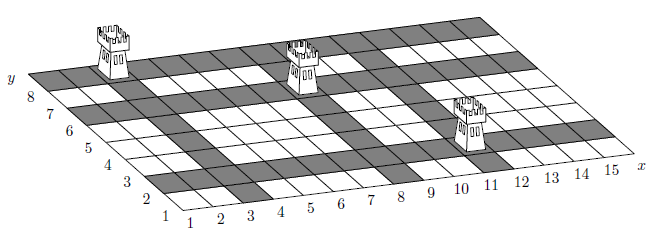



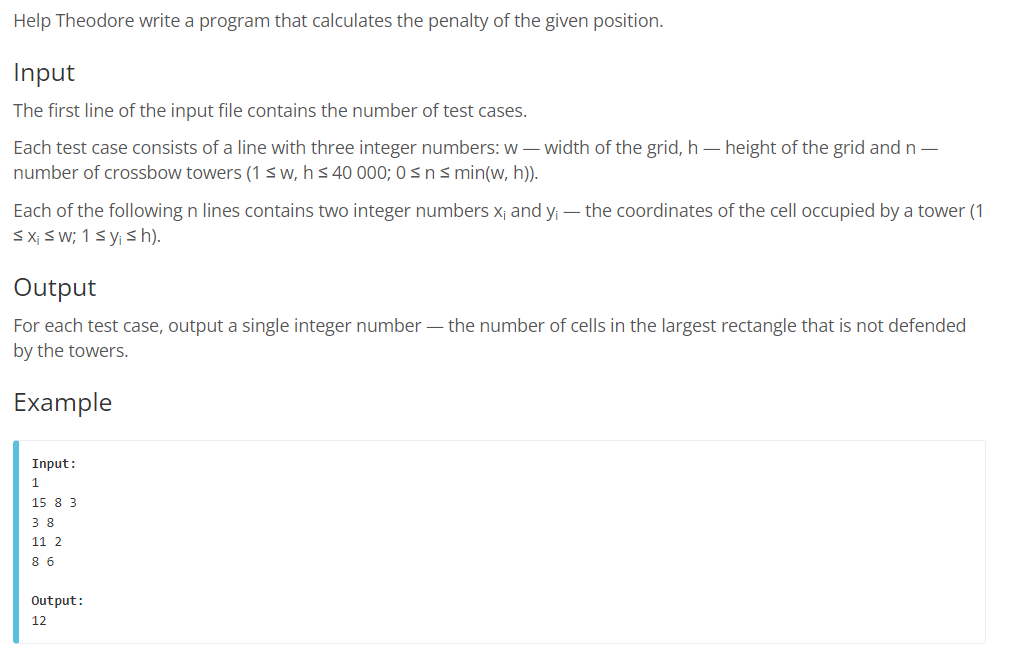

In [20]:
def kingdomking(coords, w, h):
    # Append two extra points to represent the corners of the grid
    # These points ensure that the entire grid is considered
    coords.append([0, 0])
    coords.append([w+1, h+1])
    
    # Sort the coordinates first based on their x values
    coords.sort()
    
    # Initialize variables to track the maximum length and width of the undefended rectangle
    max_length = -9999999
    pre_x = coords[0][0]  # Initialize previous x-coordinate
    
    # Iterate through sorted coordinates to find the maximum length of undefended rectangle
    for item in coords[1:]:
        # Calculate the gap between current and previous x-coordinate
        length = item[0] - pre_x - 1
        
        # Update the maximum length if the calculated length is greater
        max_length = max(length, max_length)
        
        pre_x = item[0]  # Update previous x-coordinate for the next iteration
    
    # Sort the coordinates based on their y values
    coords.sort(key=lambda x: x[1])
    
    # Initialize variables to track the maximum width of the undefended rectangle
    max_width = -99999
    pre_y = coords[0][1]  # Initialize previous y-coordinate
    
    # Iterate through sorted coordinates to find the maximum width of undefended rectangle
    for item in coords[1:]:
        # Calculate the gap between current and previous y-coordinate
        width = item[1] - pre_y - 1
        
        # Update the maximum width if the calculated width is greater
        max_width = max(width, max_width)
        
        pre_y = item[1]  # Update previous y-coordinate for the next iteration
    
    # Return the product of the maximum length and maximum width of the undefended rectangle
    return max_width * max_length


In [21]:
coords = [[3, 8], [11, 2], [8, 6]]
w = 15
h = 8
kingdomking(coords, w, h)

12

# DIEHARD - DIE HARD
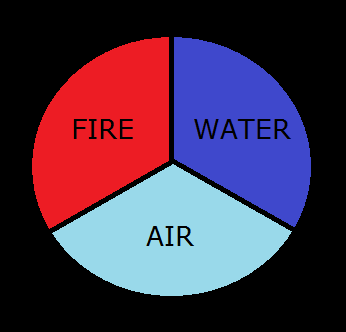
The game is simple. You initially have ‘H’ amount of health and ‘A’ amount of armor. At any instant you can live in any of the three places - fire, water and air. After every unit time, you have to change your place of living. For example if you are currently living at fire, you can either step into water or air.

If you step into air, your health increases by 3 and your armor increases by 2

If you step into water, your health decreases by 5 and your armor decreases by 10

If you step into fire, your health decreases by 20 and your armor increases by 5

If your health or armor becomes <=0, you will die instantly

Find the maximum time you can survive.

Input:

The first line consists of an integer t, the number of test cases. For each test case there will be two positive integers representing the initial health H and initial armor A.


Output:

For each test case find the maximum time you can survive.

 

Note: You can choose any of the 3 places during your first move.

 

Input Constraints:

1 <= t <= 10
1 <= H, A <= 1000

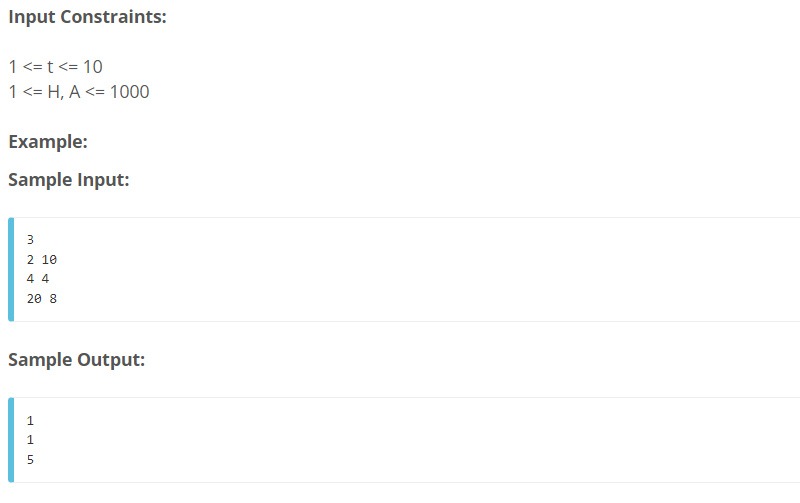


In [22]:
def diehard(H, A):
    
    #1. Air = H += 3 and A += 2        
    #2. Water = H -= 5 and A -= 10
    #3. Fire  = H -= 20 and A += 5
    
    if H <= 0 or A <= 0 :
        return 0
    
    a = solver(1, H + 3, A +2)
    b = solver(2, H-5, A-10)
    c = solver(3, H - 20, A + 5)
    
    return max(a, b, c)

def solver(pre, H, A):
    if H <= 0 or A <= 0 :
        return 0
    a, b, c, d, e, f = 0, 0, 0, 0, 0, 0
    if pre == 1:
        a = solver(2, H-5, A-10)      # going into 2
        b = solver(3, H-20, A + 5)
        
    elif pre == 2 :
        c = solver(1, H+3, A + 2)
        d = solver(3, H-20, A + 5)
    
    else:
        e = solver(1, H +3, A +2)
        f = solver(2, H - 5, A - 10)
        
    return max(a, b, c, d, e, f) + 1

diehard(2, 10), diehard(4, 4), diehard(20, 8), diehard(20, 20)


# Explained :
def diehard(H, A):
    # Helper function to recursively calculate the maximum survival time
    def solver(pre, H, A):
        if H <= 0 or A <= 0:
            return 0
        
        # Initialize variables to calculate the survival time for different choices
        a, b, c, d, e, f = 0, 0, 0, 0, 0, 0
        
        if pre == 1:
            # If the previous place was air, check survival time for going into water and fire
            a = solver(2, H - 5, A - 10)  # Going into water
            b = solver(3, H - 20, A + 5)  # Going into fire
        
        elif pre == 2:
            # If the previous place was water, check survival time for going into air and fire
            c = solver(1, H + 3, A + 2)   # Going into air
            d = solver(3, H - 20, A + 5)  # Going into fire
        
        else:
            # If the previous place was fire, check survival time for going into air and water
            e = solver(1, H + 3, A + 2)   # Going into air
            f = solver(2, H - 5, A - 10)  # Going into water
        
        # Return the maximum survival time considering all possible choices, and increment it by 1
        return max(a, b, c, d, e, f) + 1
    
    # Initial function call with three possible choices
    a = solver(1, H + 3, A + 2)  # Choosing air
    b = solver(2, H - 5, A - 10)  # Choosing water
    c = solver(3, H - 20, A + 5)  # Choosing fire
    
    # Return the maximum survival time among the three initial choices
    return max(a, b, c)

# Test cases
print(diehard(2, 10))   # Output: 1
print(diehard(4, 4))    # Output: 1
print(diehard(20, 8))   # Output: 4
print(diehard(20, 20))  # Output: 5

1
1
5
5


In [23]:
dp = [[-1] * 1000 for _ in range(1000)]  # Initialize the DP array

def diehard(H, A):
    global dp
    
    # Helper function to recursively calculate the maximum survival time
    def solver(pre, H, A):
        if H <= 0 or A <= 0:
            return 0
        
        if dp[H][A] != -1:
            return dp[H][A]
        
        # Initialize variables to calculate the survival time for different choices
        a, b, c, d, e, f = 0, 0, 0, 0, 0, 0
        
        if pre == 1:
            # If the previous place was air, check survival time for going into water and fire
            a = solver(2, H - 5, A - 10)  # Going into water
            b = solver(3, H - 20, A + 5)  # Going into fire
        
        elif pre == 2:
            # If the previous place was water, check survival time for going into air and fire
            c = solver(1, H + 3, A + 2)   # Going into air
            d = solver(3, H - 20, A + 5)  # Going into fire
        
        else:
            # If the previous place was fire, check survival time for going into air and water
            e = solver(1, H + 3, A + 2)   # Going into air
            f = solver(2, H - 5, A - 10)  # Going into water
        
        # Store the calculated result in the DP array and return it
        dp[H][A] = max(a, b, c, d, e, f) + 1
        return dp[H][A]
    
    # Initial function call with three possible choices
    a = solver(1, H + 3, A + 2)  # Choosing air
    b = solver(2, H - 5, A - 10)  # Choosing water
    c = solver(3, H - 20, A + 5)  # Choosing fire
    
    # Return the maximum survival time among the three initial choices
    return max(a, b, c)

# Test cases
print(diehard(2, 10))   # Output: 1
print(diehard(4, 4))    # Output: 1
print(diehard(20, 8))   # Output: 4
print(diehard(20, 20))  # Output: 5


1
1
5
5


# Gergovia - Wine Trading in gergovia

Gergovia consists of one street, and every inhabitant of the city is a wine salesman. Everyone buys wine from other inhabitants of the city. Every day each inhabitant decides how much wine he wants to buy or sell. Interestingly, demand and supply is always the same, so that each inhabitant gets what he wants.

There is one problem, however: Transporting wine from one house to another results in work. Since all wines are equally good, the inhabitants of Gergovia don't care which persons they are doing trade with, they are only interested in selling or buying a specific amount of wine.

In this problem you are asked to reconstruct the trading during one day in Gergovia. For simplicity we will assume that the houses are built along a straight line with equal distance between adjacent houses. Transporting one bottle of wine from one house to an adjacent house results in one unit of work.

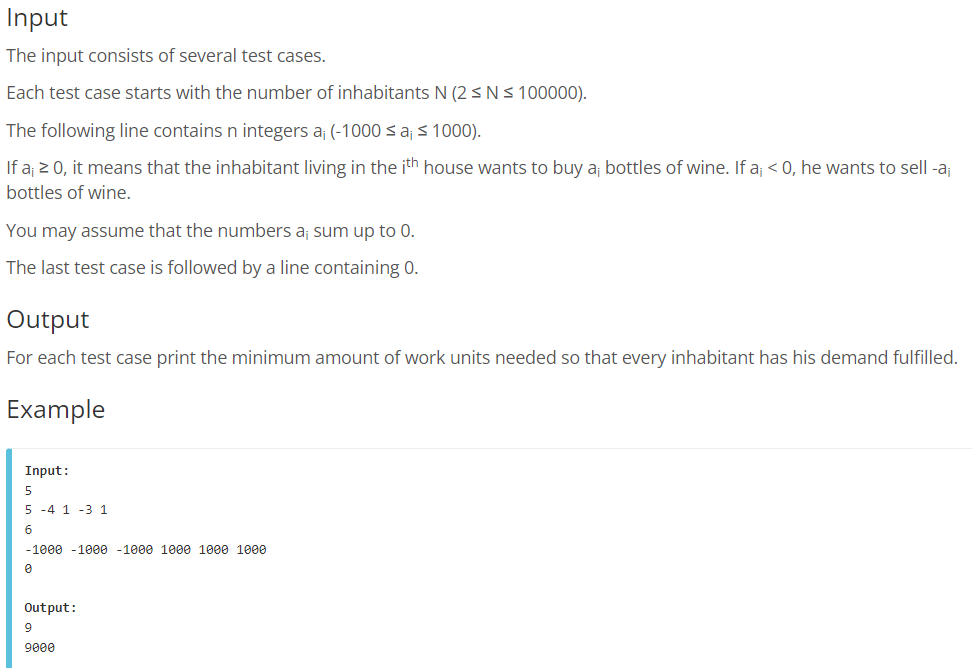

In [24]:
def winetrade(qty):
    n = len(qty)

    # Helper function to find the indices of the minimum and maximum quantity houses
    def minqty(qty):
        minid = 0
        maxid = 0
        for i in range(n):
            # Update minid if a house with lower wine quantity is found
            if qty[i] < qty[minid]:
                minid = i
            
            # Update maxid if a house with higher wine quantity is found
            if qty[i] > qty[maxid]:
                maxid = i
    
        return minid, maxid
    
    ans = 0
    while (1):
        # Find the indices of the house with minimum and maximum quantity
        minid, maxid = minqty(qty)
        
        # If both houses have no more wine to trade, return the accumulated work
        if qty[minid] == 0 and qty[maxid] == 0:
            return ans
    
        maxval = qty[maxid]
        minval = qty[minid]
        
        # Calculate the amount of wine to be traded between the houses
        minsend = min(-minval, maxval)
        
        # Update the accumulated work based on the amount of wine traded
        ans += abs(maxid - minid) * minsend
        
        # Update the wine quantities in the respective houses
        qty[minid] += minsend
        qty[maxid] -= minsend
    
    return ans


In [25]:
qty1 = [5, -4, 1, -3, 1]
qty2 = [-1000, -1000, -1000, 1000, 1000, 1000]
winetrade(qty1), winetrade(qty2)

(9, 9000)

# GCJ101BB - Picking up chicks
A flock of chickens are running east along a straight, narrow road. Each one is running with its own constant speed. Whenever a chick catches up to the one in front of it, it has to slow down and follow at the speed of the other chick. You are in a mobile crane behind the flock, chasing the chicks towards the barn at the end of the road. The arm of the crane allows you to pick up any chick momentarily, let the chick behind it pass underneath and place the picked up chick back down. This operation takes no time and can only be performed on a pair of chicks that are immediately next to each other, even if 3 or more chicks are in a row, one after the other.

Given the initial locations (Xi) at time 0 and natural speeds (Vi) of the chicks, as well as the location of the barn (B), what is the minimum number of swaps you need to perform with your crane in order to have at least K of the N chicks arrive at the barn no later than time T?

You may think of the chicks as points moving along a line. Even if 3 or more chicks are at the same location, next to each other, picking up one of them will only let one of the other two pass through. Any swap is instantaneous, which means that you may perform multiple swaps at the same time, but each one will count as a separate swap.

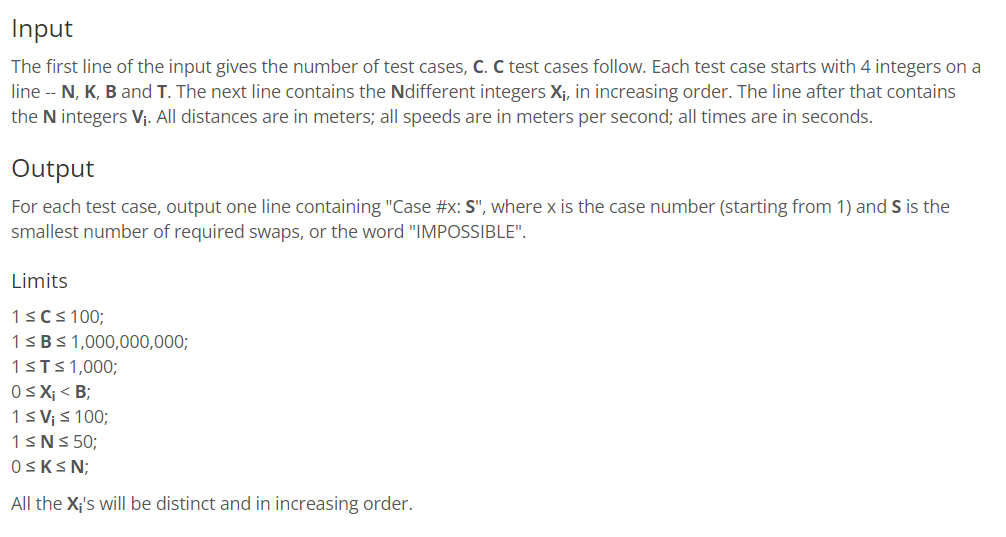

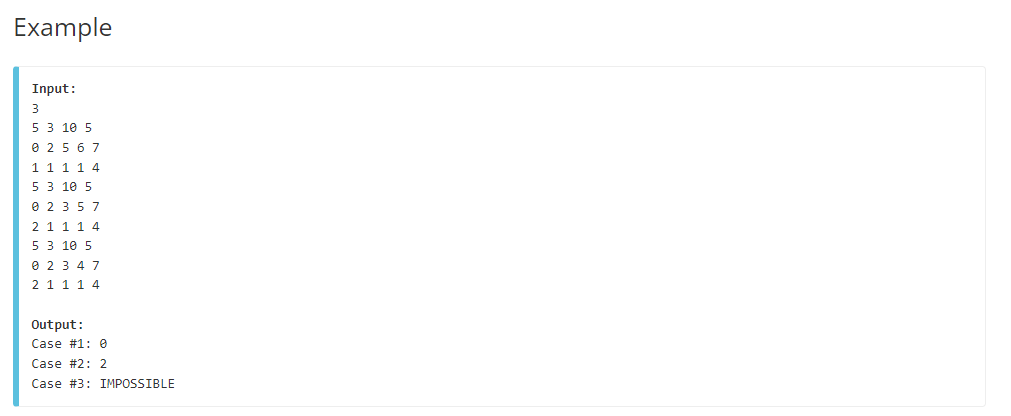

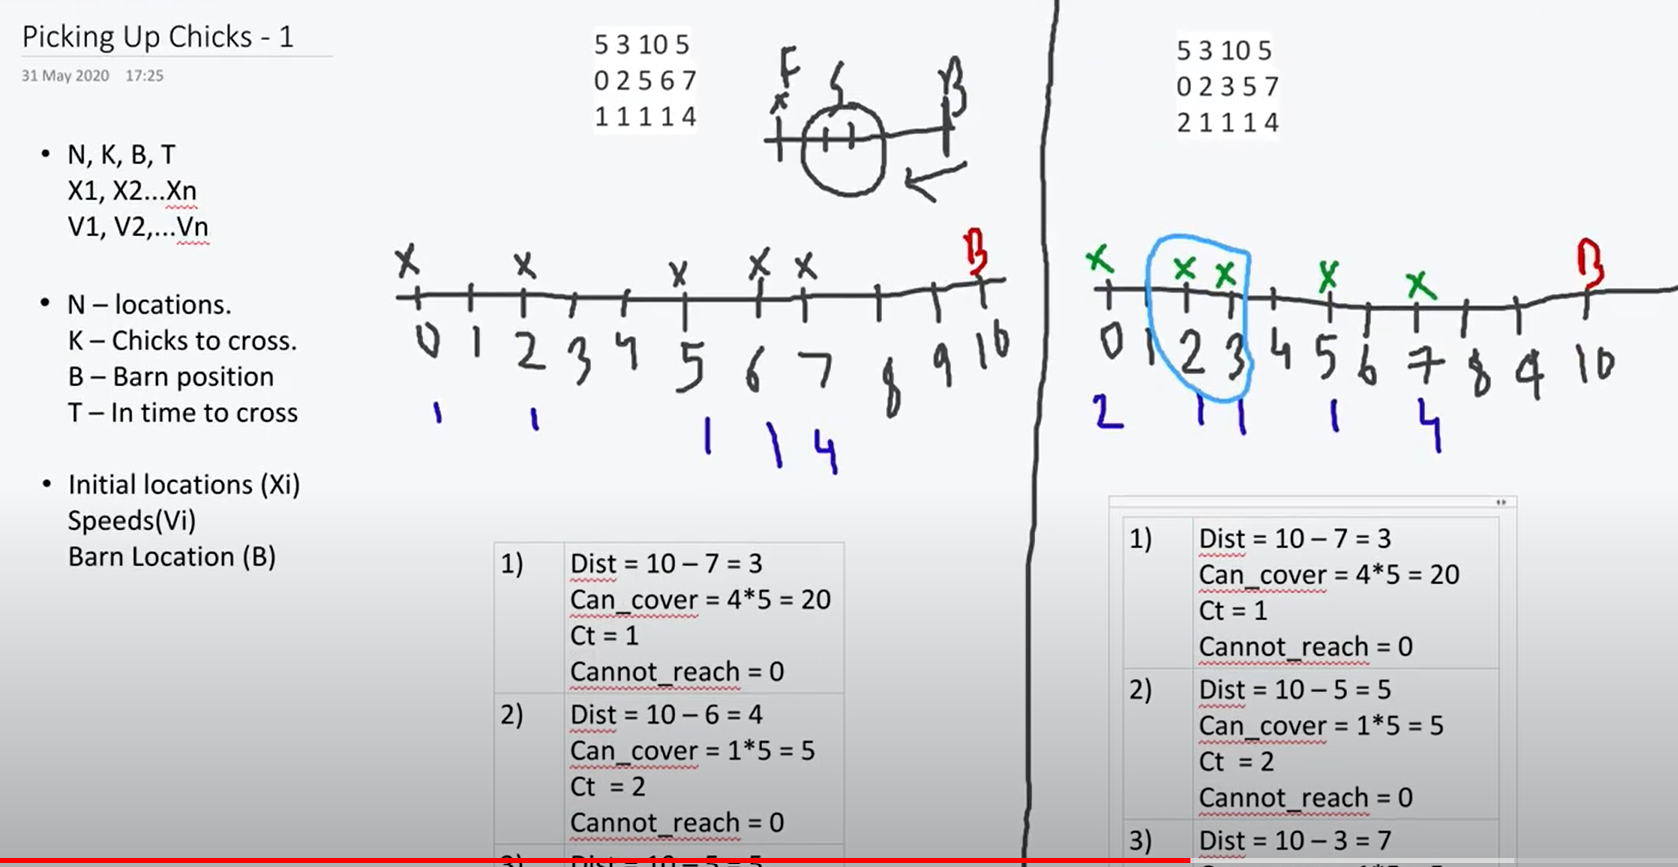

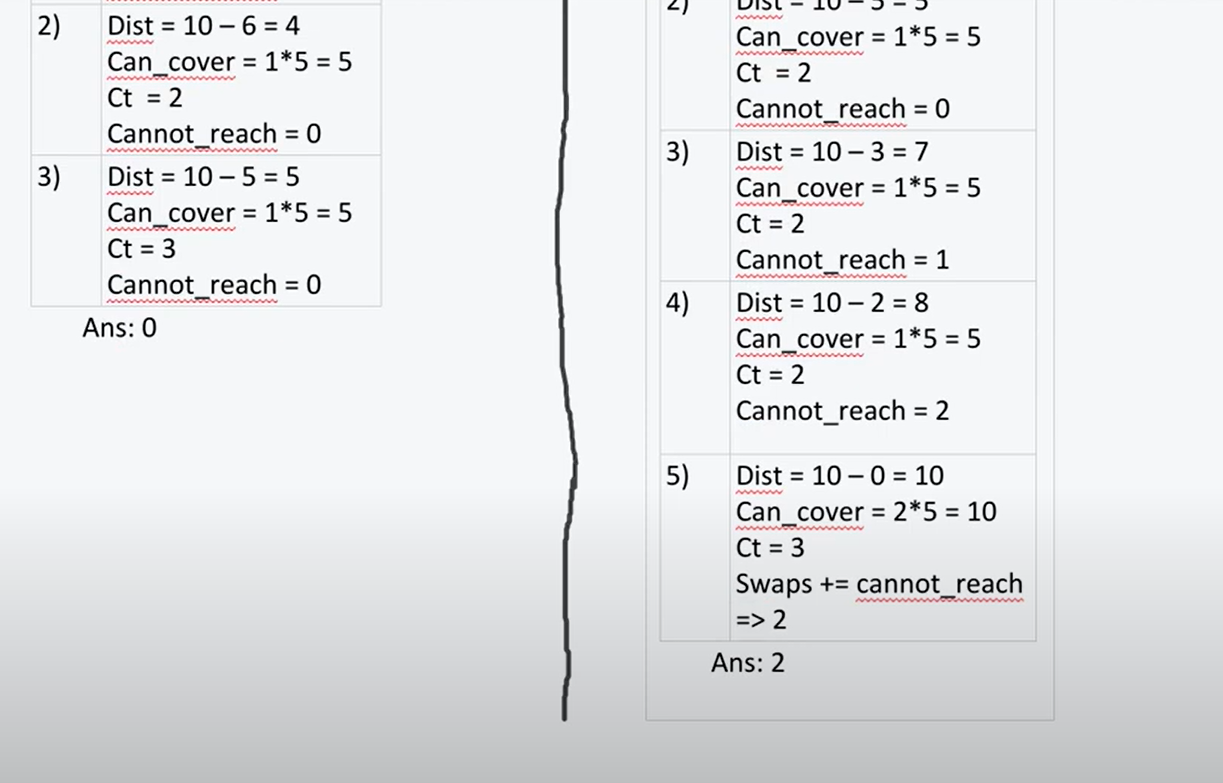

In [26]:
def chickswapping(N, K, B, T, X, V):
    n = N 
    
    # Calculate the updated positions of the chicks after time T
    for i in range(n):
        X[i] = X[i] + V[i] * T
    
    count = 0  # Number of chicks that can reach the barn (B)
    slow = 0   # Number of chicks that are slower and can't reach the barn
    swaps = 0  # Total swaps needed
    
    # Iterate through the chicks in reverse order (from the closest to the farthest)
    for i in range(n - 1, -1, -1):
        if X[i] >= B:
            count += 1
            swaps += slow
        else:
            slow += 1
        
        # If K chicks have reached the barn, return the number of swaps required
        if count >= K:
            return swaps
    
    return 'Impossible'


In [27]:
N, K, B, T = 5, 3, 10, 5
X = [0, 2, 5, 6, 7]
V = [1, 1, 1, 1, 4]

print(chickswapping(N, K, B, T, X, V))

X = [0, 2, 3, 5, 7]
V = [2, 1, 1, 1, 4]

print(chickswapping(N, K, B, T, X, V))

X = [0, 2, 3, 4, 7]
V = [2, 1, 1, 1, 4]

print(chickswapping(N, K, B, T, X, V))

0
2
Impossible


# ARRANGE - Arranging Amplifiers
Scientists at the TIFR, Mumbai, are doing some cutting edge research on the Propagation of Signals. A young researcher comes up with a method of progressively amplifying signals, as they progress along a path. The method involves the placing of Amplifiers at regular distances along the line. Each amplifier is loaded with a number a(i), which is called its amplification factor. The method of amplification is simple: an amplifier which recieves a signal of strength X, and has Y loaded in it, results in a signal of strength Y^X [ Y to the power X]. In course of his research, the young scientist tries to find out, that given a set of n amplifiers loaded with a(0), a(1), a(2), ...., a(n-1), which particular permutation of these amplifiers, when placed at successive nodes, with the initial node given a signal of strength 1, produces the strongest output signal.

this is better illustrated by the following example : 5 6 4
4^(5^(6^1)) is the strength of the strongest signal, which is generated by putting amplifier loaded with 6 in first place, 5 in second place and 4 in third place.

Given a list of integers specifying the set of amplifiers at hand, you must find out the order in which they must be placed, to get the highest signal strength. In case their exist multiple permutations with same output, you should print the one which has bigger amplifiers first.
Input
First line of input contains T, the number of test cases. For each test case first line contains a number ni, which is equal to the number of amplifiers available. Next line contains n integers, separated by spaces which denote the values with which the amplifiers are loaded.

Output
Output contains T lines, one for each test case. Each line contains ni integers, denoting the order in which the amplifiers should be kept such that the result is strongest.

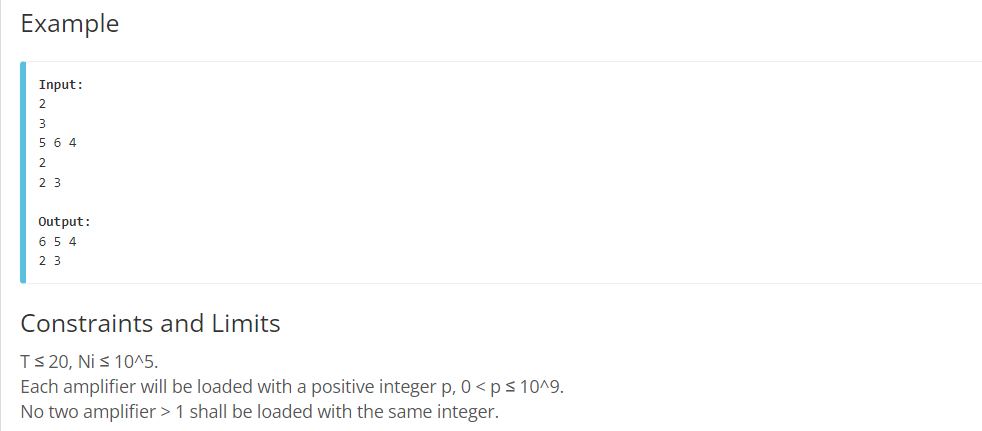

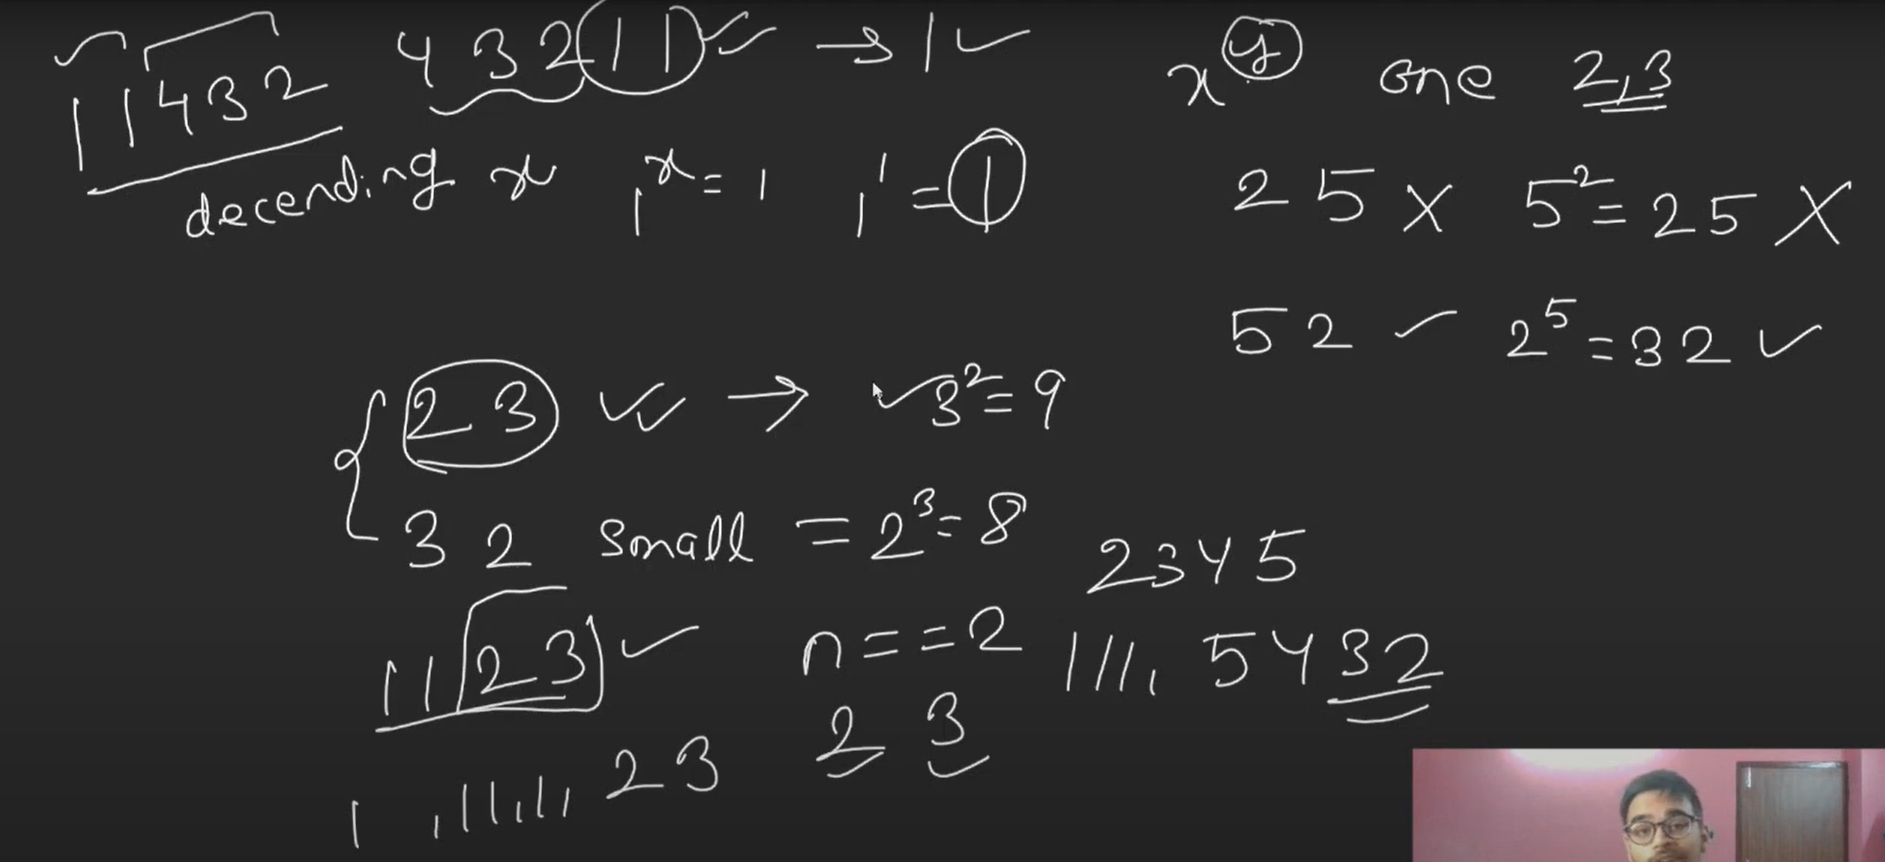

In [28]:
def printarrangement(amps, n):
    # Sort the amplifiers in decreasing order
    amps.sort(reverse=True)
    
    cntone = 0  # Count of amplifiers with value 1
    ans = []    # List to store the arrangement
    
    # Count the number of amplifiers with value 1
    for i in range(n):
        if amps[i] == 1:
            cntone += 1
    
    # Add amplifiers with value 1 to the arrangement
    for i in range(cntone):
        ans += [1]
    
    # Special case handling: if there are two amplifiers with values 2 and 3,
    # place them in this order (since 3^2 > 2^3)
    if n - cntone == 2 and amps[0] == 2 and amps[1] == 3:
        ans += [2]
        ans += [3]
    else:
        # Add the remaining amplifiers to the arrangement
        for j in range(n - cntone):
            ans += [amps[j]]
    
    return ans


In [29]:
amps = [5, 6, 4]
n = 3
print(printarrangement(amps, n))

amps = [1, 5, 6, 1, 4]
n = 5
printarrangement(amps, n)

[6, 5, 4]


[1, 1, 6, 5, 4]

# Smallest Subset sum
You are given an array Arr of size N containing non-negative integers. Your task is to choose the minimum number of elements such that their sum should be greater than the sum of the rest of the elements of the array.


In [30]:
class Solution:
    def minSubset(self, A, N):
        total = 0  # Initialize a variable to store the total sum of all elements
        
        # Calculate the total sum of all elements in the array
        for item in A:
            total += item
        
        # Sort the array in descending order
        A.sort(reverse=True)
        
        count = 0  # Initialize a variable to keep track of the number of elements chosen
        sum1 = 0   # Initialize a variable to keep track of the sum of chosen elements
        
        # Iterate through the sorted array
        for item in A:
            sum1 += item
            total -= item
            count += 1
            
            # If the sum of chosen elements becomes greater than the sum of the rest of the elements,
            # return the count of chosen elements
            if sum1 > total:
                return count
                
        # If the loop completes without returning, return the count of chosen elements
        return count


# Chocolate distribution problem
Given an array A[ ] of positive integers of size N, where each value represents the number of chocolates in a packet. Each packet can have a variable number of chocolates. There are M students, the task is to distribute chocolate packets among M students such that :
1. Each student gets exactly one packet.
2. The difference between maximum number of chocolates given to a student and minimum number of chocolates given to a student is minimum.

In [31]:
class Solution:
    def findMinDiff(self, A, N, M):
        A.sort()  # Sort the array in ascending order
        
        i = 0  # Initialize a pointer for the start of the subarray
        j = M - 1  # Initialize a pointer for the end of the subarray
        
        min1 = 99999999  # Initialize a variable to store the minimum difference
        
        # Iterate until the end pointer goes beyond the array size
        while j < N:
            # Update the minimum difference by comparing the current difference and the previous minimum
            min1 = min(min1, A[j] - A[i])
            
            # Move both pointers to the right
            i += 1
            j += 1
        
        return min1


# K - centres Problem

You have given N cities numbered from 0 to N-1. The distance between each pair of cities is given by N * N matrix MAT where MAT[i][j] denotes the distance between city i and j.
The task is to select K (K<= N) ATM servers  in such a way that the maximum distance of a city from the ATM Server is minimized.

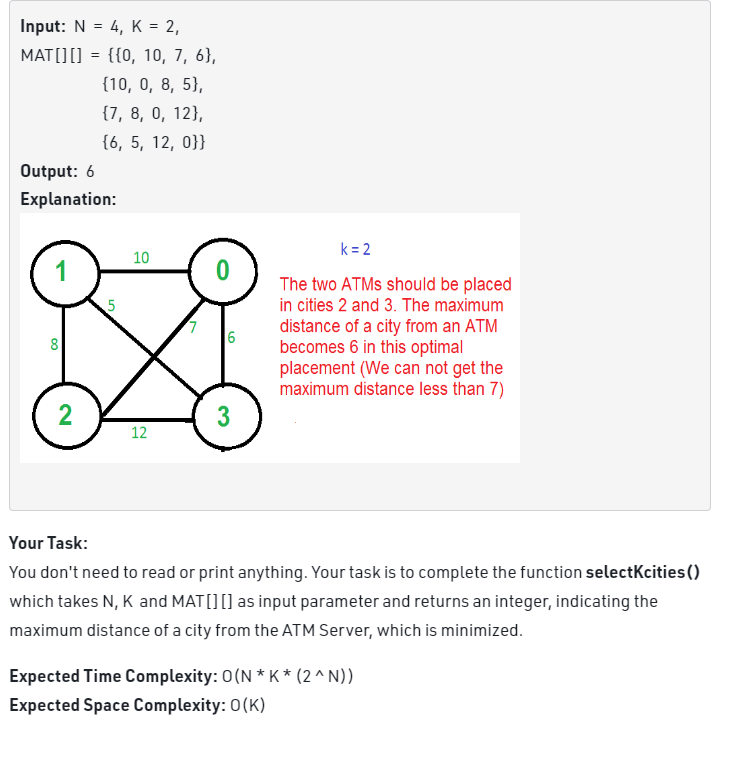

# Minimum cost of ropes -- Impo
There are given N ropes of different lengths, we need to connect these ropes into one rope. The cost to connect two ropes is equal to sum of their lengths. The task is to connect the ropes with minimum cost. Given N size array arr[] contains the lengths of the ropes. 

In [32]:
import heapq

class Solution:
    # Function to return the minimum cost of connecting the ropes.
    def minCost(self, arr, n):
        if n == 1:
            return 0  # If there's only one rope, no cost is incurred
        
        cost = 0  # Initialize a variable to store the total cost
        
        heapq.heapify(arr)  # Convert the array into a min-heap
        
        # Continue the process until there's only one rope left
        while len(arr) > 1:
            first = heapq.heappop(arr)   # Remove the smallest rope length
            second = heapq.heappop(arr)  # Remove the second smallest rope length
            cost += (first + second)     # Add the sum of lengths to the cost
            heapq.heappush(arr, (first + second))  # Push the combined length back to the heap
            
        return cost


# Smallest Number --- VVV impo
The task is to find the smallest number with given sum of digits as S and number of digits as D.

In [33]:
class Solution:
    def smallestNumber(self, S, D):
        # Check if it's not possible to create a number with given sum of digits and number of digits
        if 9 * D < S:
            return -1
        
        str1 = ''  # Initialize an empty string to store the resulting number
        
        # Loop until the required sum of digits (S) and number of digits (D) are achieved
        while S > 0 and D > 0:
            if S <= 9 and D == 1:
                # If there's only one digit left to add and the remaining sum is <= 9
                str1 += str(S)  # Append the remaining sum
                S -= S  # Deduct the remaining sum from S
                D = 0   # Set D to 0 to terminate the loop
            
            elif S <= 9 and D > 1:
                # If there's more than one digit left to add and the remaining sum is <= 9
                str1 += str(S - 1)  # Append 1 less than the remaining sum
                S = 1   # Set S to 1 to terminate the loop
                D -= 1  # Reduce the count of remaining digits
            
            elif S == 1 and D > 1:
                # If there's more than one digit left to add and the remaining sum is 1
                str1 += str(0)  # Append 0
                D -= 1  # Reduce the count of remaining digits
            
            else:
                # If there's more than one digit left to add and the remaining sum is >= 9
                str1 += str(9)  # Append 9
                S -= 9  # Deduct 9 from the remaining sum
                D -= 1  # Reduce the count of remaining digits
        
        return str1[::-1]  # Reverse the string to get the correct order


# Find maximum equal sum of three stacks
Given three stacks S1, S2 & S3 of size N1, N2 & N3 respectively, having only Positive Integers. The task is to find the possible equal maximum sum of the stacks with the removal of top elements allowed. Stacks are represented as an array, and the first index of the array represents the top element of the stack.

In [34]:
from typing import List

class Solution:
    def maxEqualSum(self, N1:int, N2:int, N3:int, S1:List[int], S2:List[int], S3:List[int]) -> int:
        # Initialize variables to store the sum of each stack
        sum1 = sum(S1)
        sum2 = sum(S2)
        sum3 = sum(S3)
        
        # Initialize pointers for each stack
        idx1 = 0
        idx2 = 0
        idx3 = 0
        
        # Loop until the pointers are within the bounds of each stack
        while idx1 < N1 and idx2 < N2 and idx3 < N3:
            # Compare the sums of stacks and choose the one with the maximum sum
            if (sum1 >= sum2 and sum1 > sum3) or (sum1 > sum2 and sum1 >= sum3):
                sum1 -= S1[idx1]
                idx1 += 1
                
            elif (sum2 >= sum1 and sum2 > sum3) or (sum2 > sum1 and sum2 >= sum3):
                sum2 -= S2[idx2]
                idx2 += 1
            
            elif (sum3 >= sum1 and sum3 > sum2) or (sum3 > sum1 and sum3 >= sum2):
                sum3 -= S3[idx3]
                idx3 += 1
            
            # If all three stacks have equal sums, return the sum
            elif sum1 == sum2 and sum2 == sum3:
                return sum1
        
        # If no equal maximum sum is found, return 0
        return 0


# Rearrange Characters -- Impo
Given a string S with repeated characters. The task is to rearrange characters in a string such that no two adjacent characters are the same.
Note: The string has only lowercase English alphabets and it can have multiple solutions. Return any one of them.

In [35]:
class Solution:
    def rearrangeString(self, str):
        n = len(str)  # Get the length of the input string
        map1 = {}     # Initialize a dictionary to store character frequencies
        
        maxfreq = [0, None]  # Initialize maxfreq to store the character with the maximum frequency
        
        # Calculate character frequencies and update maxfreq
        for i in range(n):
            if str[i] in map1:
                map1[str[i]] += 1
            else:
                map1[str[i]] = 1
            
            if map1[str[i]] > maxfreq[0]:
                maxfreq = [map1[str[i]], str[i]]
                
        mfreq = maxfreq[0]  # Maximum frequency of a character
        cfreq = maxfreq[1]  # Character with maximum frequency
        
        # Check if the character with maximum frequency appears more than half the string length
        if mfreq > (n + 1) // 2:
            return str  # In this case, no rearrangement is possible
        
        arr = [None for _ in range(n)]  # Initialize an array to store the rearranged string
        
        i = 0  # Pointer for array index
        while i < n and map1[cfreq] > 0:
            arr[i] = cfreq         # Place the character with maximum frequency in the array
            map1[cfreq] -= 1       # Decrement the frequency of the character
            if map1[cfreq] == 0:   # If frequency becomes 0, move to the next character
                i += 1
                break
            i += 2  # Move to the next available even index
        
        # Place the remaining characters in the array
        for key in map1.keys():
            if i >= n:
                i = 1
            while map1[key] > 0:
                if arr[i] == None:
                    arr[i] = key    # Place the character in the array
                    map1[key] -= 1  # Decrement the frequency
                    i += 2  # Move to the next available even index
                else:
                    i += 1  # Move to the next index
                if i >= n:
                    i = 1
        
        # Convert the array to a string
        str1 = ''
        for item in arr:
            if item != None:
                str1 += item
        
        return str1  # Return the rearranged string


# --------------Solved By - Suraj------------------